# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』に形態素解析器MeCabを適用し，小説中の単語の統計を求めます．

- 形態素解析, MeCab, 品詞, 出現頻度, Zipfの法則, matplotlib, Gnuplot

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

MeCabとpython wrapperをインストールする。
https://qiita.com/taroc/items/b9afd914432da08dafc8

```bash
brew install mecab
brew install mecab-ipadic
brew install swig
pip install mecab-python3
```

In [112]:
import itertools
import re
import requests

import numpy as np
import MeCab

In [12]:
!curl http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  943k  100  943k    0     0  1293k      0 --:--:-- --:--:-- --:--:-- 1293k


In [13]:
ls

README.md               chapter_4.ipynb         out_chapter2_16_1.txt
chapter2_14.py          col1.txt                out_chapter2_16_2.txt
chapter2_15.py          col2.txt                out_chapter2_16_aa
chapter2_16.py          hightemp.txt            out_chapter2_16_ab
chapter_1.ipynb         jawiki-country.json.gz  out_chapter2_16_ac
chapter_2.ipynb         neko.txt                out_col12.txt
chapter_3.ipynb         out_chapter2_16_0.txt


In [14]:
!head neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。


In [17]:
!mecab neko.txt > neko.txt.mecab

In [21]:
!head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


コマンドラインから単体で使えるようで、python wrapperはこの時点では不要だったかもしれない。

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [28]:
sentences = []
sentence = []
with open(r'neko.txt.mecab') as f:
    for line in f:
        # 末尾の改行除去
        line = line.rstrip()
        if line == 'EOS':
            sentences.append(sentence)
            sentence = []
        else:
            morpheme = {}
            # 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
            print(line)
            morpheme['surface'], rest = tuple(line.split('\t'))
            morpheme['pos'], morpheme['pos1'], _pos2, _pos3, _conjtype, _form, morpheme['base'], _kana, _sound = tuple(rest.split(','))
            sentence.append(morpheme)


一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
　	記号,空白,*,*,*,*,　,　,
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント
見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ
でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ
薄暗い	形容詞,自立,*,*,形容詞・アウオ段,基本形,薄暗い,ウスグライ,ウスグライ
じめじめ	副詞,一般,*,*,*,*,じめじめ,ジメジメ,ジメジメ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
所	名詞,非自立,副詞可能,*,*,*,所,トコロ,トコロ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
ニャーニャー	名詞,一般,*,*,*,*,*


ValueError: not enough values to unpack (expected 9, got 7)

In [37]:
sentences = []
sentence = []
re_line = r"""
(?P<surface>[^,]+)\t
(?P<pos>[^,]+),
(?P<pos1>[^,]+),
(?P<pos2>[^,]+),
(?P<pos3>[^,]+),
(?P<conjtype>[^,]+),
(?P<form>[^,]+),
(?P<base>[^,]+)
(
    ,(?P<kana>[^,]+)
    ,(?P<sound>[^,]+)
)?
"""

with open(r'neko.txt.mecab') as f:
    for line in f:
        # 末尾の改行除去
        line = line.rstrip()
        if line == 'EOS':
            sentences.append(sentence)
            sentence = []
        else:
            # 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
            m = re.match(re_line, line, re.VERBOSE)
            morpheme = {
                'surface': m.group('surface'),
                'base': m.group('base'),
                'pos': m.group('pos'),
                'pos1': m.group('pos1'),
            }            
            sentence.append(morpheme)

In [38]:
sentences[:7]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'po

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [43]:
verbs = list(filter(lambda m: m['pos'] == '動詞', itertools.chain(*sentences)))
verb_surfaces = list(map(lambda m: m['surface'], verbs))
verb_surfaces[:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

In [41]:
set(verb_surfaces)

{'る',
 '覗く',
 '這い出そ',
 'しろ',
 '超える',
 '書き散らし',
 '抜ける',
 '差支え',
 '浚い',
 '着せる',
 '間に合う',
 'なげ',
 '取りかかる',
 '作る',
 '縫いつけ',
 '出向い',
 '浮ぶ',
 '絞',
 '注い',
 '就い',
 '決める',
 'ごねる',
 '通り過ぎる',
 'つけれ',
 '別れ',
 'たとえ',
 '御し',
 '舞い込ん',
 '契っ',
 '立ち入っ',
 '問い返さ',
 '引きあげる',
 'れよ',
 '悟る',
 'いけ',
 '眠れ',
 '出れ',
 '祟っ',
 '合し',
 '務まる',
 '流れれ',
 '踏み',
 'きれ',
 '見廻っ',
 '穿つ',
 'くらす',
 '陥れる',
 '罹り',
 '詫び',
 'わから',
 '生れ',
 'なすっ',
 '寝込ん',
 'よむ',
 'じらし',
 '譲る',
 '弱り',
 '乞う',
 '写し出す',
 '使わ',
 '陳べ',
 'ひるん',
 '困ら',
 '引い',
 '奢る',
 '起きる',
 'いただい',
 '雇っ',
 '切っ',
 '重んぜ',
 'すぎ',
 '切る',
 '見',
 '泣かし',
 '付い',
 '隣り',
 '済ます',
 '釣り合わ',
 '怪しま',
 'もがい',
 '連れ出さ',
 '歩み寄っ',
 '覚まし',
 '止す',
 '気がつく',
 '寝る',
 'しかっ',
 '受け合う',
 '極まっ',
 '罵っ',
 'たけ',
 '待た',
 '乗ら',
 '抑え',
 '送っ',
 '吸い',
 '書き流し',
 '増し',
 'ぶら下げ',
 'なる',
 '覚め',
 '買う',
 '眠っ',
 '出掛け',
 '立てる',
 '撚っ',
 '過ぎ去っ',
 '直そ',
 '借',
 '懸け',
 'しゃべり',
 '取れ',
 '覚し',
 'いき',
 '述べ',
 '講じ',
 '込める',
 '飲む',
 '転がれ',
 'もらわ',
 'できる',
 '直し',
 '食える',
 '見下ろし',
 '応じ',
 '放す',
 '明け',
 '転がっ',
 '逆上せ',
 '釣れる',
 'そい',
 

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [44]:
verb_bases = list(map(lambda m: m['base'], verbs))
verb_bases[:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [46]:
sahen_nouns = list(filter(lambda m: m['pos'] == '名詞' and m['pos1'] == 'サ変接続', itertools.chain(*sentences)))
sahen_nouns[:10]

[{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '話', 'base': '話', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '装飾', 'base': '装飾', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '突起', 'base': '突起', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '運転', 'base': '運転', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '分別', 'base': '分別', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '決心', 'base': '決心', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': '我慢', 'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続'}]

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [52]:
a_no_b_s = []
carry = ()
for morpheme in itertools.chain(*sentences):
    if len(carry) == 0 and morpheme['pos'] == '名詞':
        carry = (morpheme, )
    elif len(carry) == 1 and morpheme['surface'] == 'の':
        carry += (morpheme, )
    elif len(carry) == 2 and morpheme['pos'] == '名詞':
        a_no_b_s.append(carry + (morpheme, ))
        carry = ()
    else:
        carry = ()        

In [54]:
a_no_b_s[:10]

[({'surface': '彼', 'base': '彼', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'},
  {'surface': '掌', 'base': '掌', 'pos': '名詞', 'pos1': '一般'}),
 ({'surface': '掌', 'base': '掌', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'},
  {'surface': '上', 'base': '上', 'pos': '名詞', 'pos1': '非自立'}),
 ({'surface': '書生', 'base': '書生', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'},
  {'surface': '顔', 'base': '顔', 'pos': '名詞', 'pos1': '一般'}),
 ({'surface': 'はず', 'base': 'はず', 'pos': '名詞', 'pos1': '非自立'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'},
  {'surface': '顔', 'base': '顔', 'pos': '名詞', 'pos1': '一般'}),
 ({'surface': '顔', 'base': '顔', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'},
  {'surface': '真中', 'base': '真中', 'pos': '名詞', 'pos1': '一般'}),
 ({'surface': '穴', 'base': '穴', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'の', 'b

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [59]:
noun_seqs = []
carry = []
for morpheme in itertools.chain(*sentences):
    if morpheme['pos'] == '名詞':
        carry.append(morpheme)
    else:
        if len(carry) >= 2:
            noun_seqs.append(carry)
        carry = []

if len(carry) >= 2:
    noun_seqs.append(carry)

In [60]:
noun_seqs

[[{'surface': '人間', 'base': '人間', 'pos': '名詞', 'pos1': '一般'},
  {'surface': '中', 'base': '中', 'pos': '名詞', 'pos1': '接尾'}],
 [{'surface': '一番', 'base': '一番', 'pos': '名詞', 'pos1': '副詞可能'},
  {'surface': '獰悪', 'base': '獰悪', 'pos': '名詞', 'pos1': '形容動詞語幹'}],
 [{'surface': '時', 'base': '時', 'pos': '名詞', 'pos1': '非自立'},
  {'surface': '妙', 'base': '妙', 'pos': '名詞', 'pos1': '形容動詞語幹'}],
 [{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '毛', 'base': '毛', 'pos': '名詞', 'pos1': '接尾'}],
 [{'surface': 'その後', 'base': 'その後', 'pos': '名詞', 'pos1': '副詞可能'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}],
 [{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '度', 'base': '度', 'pos': '名詞', 'pos1': '接尾'}],
 [{'surface': 'ぷうぷうと', 'base': '*', 'pos': '名詞', 'pos1': '一般'},
  {'surface': '煙', 'base': '煙', 'pos': '名詞', 'pos1': '一般'}],
 [{'surface': '邸', 'base': '邸', 'pos': '名詞', 'pos1': '一般'},
  {'surface': '内', 'base': '内', 'pos': '名詞', 'pos1': '接尾'}],
 [{'sur

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [61]:
bases = list(map(lambda m: m['base'], itertools.chain(*sentences)))
bases[:10]

['一', '\u3000', '吾輩', 'は', '猫', 'だ', 'ある', '。', '名前', 'は']

In [73]:
%time counts = set(map(lambda word: (word, bases.count(word)), set(bases)))

CPU times: user 1min 24s, sys: 210 ms, total: 1min 25s
Wall time: 1min 25s


In [74]:
counts_sorted = sorted(counts, key=lambda x: x[1], reverse=True)
counts_sorted[:20]

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*', 2191),
 ('で', 2081),
 ('から', 2031)]

結果は出たが1分半以上待たされた。単語ごとに`list.count`しているため、$O(n^2)$になっている様子。
forループで書いてみる (単語の検索はdict型のハッシュに任せる)

In [76]:
%%time
counts = {}
for word in bases:
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1

CPU times: user 84.4 ms, sys: 2.85 ms, total: 87.2 ms
Wall time: 86 ms


In [77]:
counts_sorted = sorted(counts.items(), key=lambda x: x[1], reverse=True)
counts_sorted[:20]

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*', 2191),
 ('で', 2081),
 ('から', 2031)]

速くなった！Pandasでもやってみる。

In [78]:
import pandas as pd
%time pd.Series(bases).value_counts()

CPU times: user 88.1 ms, sys: 3.27 ms, total: 91.3 ms
Wall time: 89.6 ms


の        9194
。        7486
て        6848
、        6772
は        6420
に        6243
を        6071
だ        5975
と        5508
が        5337
た        4267
する       3657
「        3231
」        3225
ない       3052
も        2479
ある       2320
*        2191
で        2081
から       2031
いる       1777
ん        1568
か        1529
云う       1408
事        1207
です       1164
ます       1146
なる       1120
へ        1034
う         987
         ... 
無惨          1
作戦          1
制御          1
取り違える       1
本態          1
しょ          1
矯正          1
字義          1
盛会          1
涸らす         1
民族          1
引用          1
検査          1
うすい         1
古城          1
言い触らす       1
箍           1
国境          1
デカルト        1
赤本          1
ぶっ          1
正札          1
寝顔          1
持           1
想           1
甘ったるい       1
透く          1
各々          1
宿り          1
ねばねば        1
Length: 11251, dtype: int64

dictとあまり変わらなかった。

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [91]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
top10_freq = pd.Series(bases).value_counts()[:10]

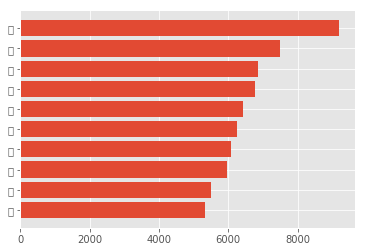

In [100]:
plt.barh(y=top10_freq.index, width=top10_freq.values)
plt.gca().invert_yaxis()

見事に日本語が豆腐になった。未設定だったので下記に従い設定。
https://qiita.com/uehara1414/items/6286590d2e1ffbf68f6c

In [101]:
!pip install japanize-matplotlib

    100% |████████████████████████████████| 4.1MB 2.1MB/s ta 0:00:01
  Stored in directory: /Users/masato/Library/Caches/pip/wheels/47/d1/ba/1a686af7cc042edde2c2f4cb18bd981f7eefdcbfe688590d25
Successfully built japanize-matplotlib


In [103]:
import japanize_matplotlib

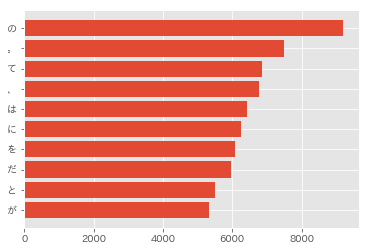

In [104]:
plt.barh(y=top10_freq.index, width=top10_freq.values)
plt.gca().invert_yaxis()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

(array([1.1218e+04, 1.3000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.2030e+02, 1.8396e+03, 2.7589e+03, 3.6782e+03,
        4.5975e+03, 5.5168e+03, 6.4361e+03, 7.3554e+03, 8.2747e+03,
        9.1940e+03]),
 <a list of 10 Patch objects>)

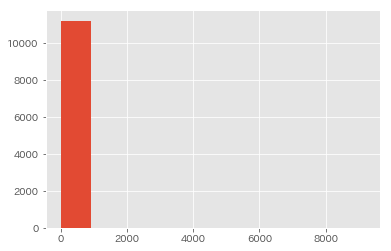

In [117]:
plt.hist(pd.Series(bases).value_counts().values)

(array([1.1066e+04, 8.9000e+01, 2.7000e+01, 1.4000e+01, 8.0000e+00,
        6.0000e+00, 7.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

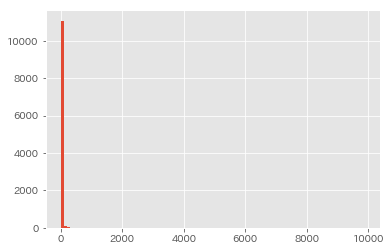

In [118]:
plt.hist(pd.Series(bases).value_counts().values, bins=np.arange(0, 10000, 100))

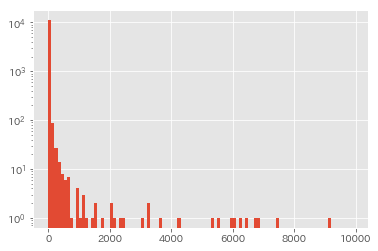

In [119]:
plt.hist(pd.Series(bases).value_counts().values, bins=np.arange(0, 10000, 100))
plt.yscale('log')

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

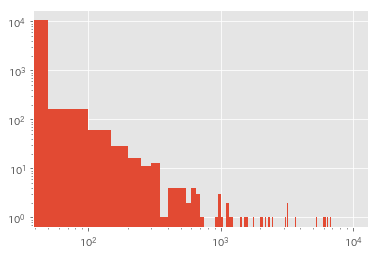

In [154]:
plt.hist(pd.Series(bases).value_counts().values, bins=np.arange(0, 10000, 50))
plt.xscale('log')
plt.yscale('log')

[Wikipedia](https://ja.wikipedia.org/wiki/ジップの法則#論理的な定義) より、Zipfの法則は
$$
f(k;s,N)=\frac{1/k^s}{\sum_{n=1}^N 1/n^s}
$$
で表されるらしく、パラメータ$s$で両対数グラフの傾きが変わりそう。

目視で、$s=2$くらいか？

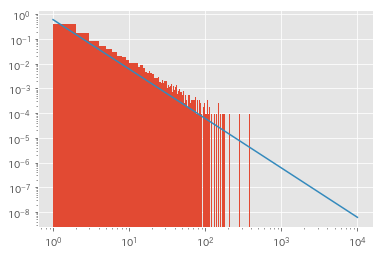

In [168]:
word_freqs = pd.Series(bases).value_counts().values

x = np.arange(1, 10000)
s=2
denom = sum(map(lambda n: 1/(n**s), range(1, len(word_freqs)+1)))

plt.hist(word_freqs, bins=x, density=True)
plt.plot(x, list(map(lambda k: 1/(k**s) / denom, x)))
plt.xscale('log')
plt.yscale('log')